# AIM0405D2203 Lab 1 Word Embedding & Deep Learning for NLP
---
Karena kita akan melakukan pemodelan untuk tugas klasifikasi teks dengan Deep Learning, maka setting runtime type ke GPU (Google Colab).

`Runtime --> Change runtime type --> Hardware accelerator: Pilih GPU --> Save`

# 01 Install & Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 02 Data Acquisition
Penjelasan Label 
* 0: SMS normal 
* 1: SMS fraud atau penipuan 
* 2: SMS promo

In [2]:
# Download dataset
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv

--2023-04-21 19:30:02--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128896 (126K) [text/plain]
Saving to: ‘dataset_sms_spam_v1.csv’

dataset_sms_spam_v1 100%[===================>] 125.88K  --.-KB/s    in 0.003s  

2023-04-21 19:30:03 (37.9 MB/s) - ‘dataset_sms_spam_v1.csv’ saved [128896/128896]



In [3]:
data = pd.read_csv('dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


# 03 Text Preprocessing

In [4]:
'''
Disini, kita tidak banyak melakukan preprocessing karena kita tidak ingin mengubah makna (konteks) dari suatu kata yang menyusun suatu kalimat
'''
import re

def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [5]:
%time data['clean_teks'] = data['teks'].apply(text_preprocessing)

# Perhatikan waktu komputasi ketika proses text preprocessing, bandingkan dengan langkah text preprocessing pada pertemuan sebelumnya

CPU times: user 22.4 ms, sys: 0 ns, total: 22.4 ms
Wall time: 24.7 ms


In [6]:
data.head()

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash mulai gb di my telkomse...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,gb hari hanya rp ribu spesial buat anda yang ...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash anda kb download myte...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash anda kb download myte...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,gb hari hanya rp ribu spesial buat anda yang ...


# 05 Word Embedding

## Word2Vec from Scratch

In [7]:
# Import library
import gensim

# Lihat versi Gensim yang digunakan
gensim.__version__

'4.3.1'

In [8]:
# Tokenize kata pada setiap kalimat
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0       [promo, beli, paket, flash, mulai, gb, di, my,...
1       [gb, hari, hanya, rp, ribu, spesial, buat, and...
2       [plg, yth, sisa, kuota, flash, anda, kb, downl...
3       [plg, yth, sisa, kuota, flash, anda, kb, downl...
4       [gb, hari, hanya, rp, ribu, spesial, buat, and...
                              ...                        
1138    [yooo, sama, oke, nanti, aku, umumin, di, grup...
1139    [sebelumnya, ga, ad, nulis, kerudung, kirain, ...
1140                                [mba, mau, kirim, ya]
1141    [nama, beaok, bwrangkat, pagimau, cas, atay, t...
1142                    [no, bri, atas, nama, kamu, mana]
Name: clean_teks, Length: 1143, dtype: object

In [9]:
# Defenisikan parameter training Word2Vec

EMBEDDING_SIZE = 100    # Dimensi word vektor / neuron pada projection (hidden) layer
WINDOW_SIZE = 5         # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah
MIN_WORD  = 1           # Model akan mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
EPOCH = 10              # Jumlah iterasi (epoch).
SG = 1                  # Strategi algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW
NEGATIVE = 5            # Negative sampling. Jika 0, negative sampling tidak digunakan

In [10]:
%%time 

# Proses training Word2Vec
from gensim.models import Word2Vec, FastText, KeyedVectors


CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 11.9 µs


In [11]:
model_word2vec = Word2Vec(sentences, vector_size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, epochs=EPOCH)

In [12]:
# Save Word2Vec sebagai full model
model_word2vec.save('myvec-word2vec-100.model')

In [13]:
# Save Word2Vec sebagai wordvectors. Hanya menyimpan kata & trained embeddingnya
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [14]:
# Cari nilai vektor dari kata tertentu
model_word2vec.wv['hadiah']

array([-0.5298218 ,  0.47508118,  0.1280835 ,  0.47817916,  0.24844705,
       -0.6995008 ,  0.00829503,  1.132826  , -0.37542057, -0.26058298,
       -0.18588743, -0.63242334, -0.23731491,  0.40331176, -0.03823139,
       -0.72760814, -0.3001608 , -0.35273606,  0.21418746, -0.7566137 ,
        0.34863693,  0.04386133,  0.25419724, -0.3635765 ,  0.12076251,
       -0.10449952, -0.1512643 , -0.11366956, -0.2737416 , -0.1261925 ,
        0.49839514, -0.01927087,  0.44348496, -0.02966686, -0.20437476,
        0.3617288 ,  0.2818285 , -0.08176968, -0.06628561, -0.6285948 ,
       -0.04222561, -0.42415679, -0.595226  , -0.08098222,  0.20994395,
       -0.19741742, -0.5248004 ,  0.04341351,  0.26664016,  0.25251666,
        0.26650873, -0.381038  , -0.16360337,  0.26157835,  0.00644401,
        0.06228196,  0.29617405, -0.20066921, -0.28774965,  0.28980246,
        0.06561536,  0.4076827 ,  0.13675787, -0.3364683 , -0.29851365,
        0.13061543,  0.06720726,  0.36075997, -0.4258164 ,  0.59

In [15]:
len(model_word2vec.wv['hadiah'])

100

In [16]:
# Menemukan kata kata teratas yang paling mirip dari kata terentu
# Menghitung kesamaan dari vektor bobot proyeksi dari kata-kata yang diberikan dan vektor untuk setiap kata dalam model.

model_word2vec.wv.most_similar('hadiah')

[('mdptkan', 0.9958285689353943),
 ('pemenang', 0.9952523112297058),
 ('undian', 0.9949703216552734),
 ('mdpt', 0.9941439628601074),
 ('mendptkan', 0.9941300749778748),
 ('terpilih', 0.993785560131073),
 ('mendapatkan', 0.9936744570732117),
 ('dri', 0.9936322569847107),
 ('yaris', 0.9934817552566528),
 ('honda', 0.9933645129203796)]

In [17]:
# Kata-kata yang ingin kita plot vektornya
word_list = ['hadiah', 'promosi', 'sms', 'malam', 'makan', 'telkomsel', 'selamat', 'juta', 'nama', 'duit', 'uang']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[-0.5298218   0.47508118  0.1280835  ... -0.29006648 -0.03570529
  -0.06763935]
 [-0.05958322  0.08425281 -0.00617992 ... -0.12936454  0.0768609
  -0.03534202]
 [ 0.00540316  0.13106391 -0.04009863 ... -0.16447763  0.07163675
  -0.00904727]
 ...
 [-0.05754294  0.11967951 -0.03029562 ... -0.28672057  0.36194795
  -0.02677373]
 [-0.04168327  0.08193595 -0.02129279 ... -0.11354105  0.08181188
  -0.0393114 ]
 [-0.22034407  0.22396934  0.02061229 ... -0.2639025   0.03246467
  -0.06330401]]


In [18]:
# Reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [19]:
# Lihat vektor hasil PCA (dari 5 dimensi menjadi 2 dimensi)
red_word_vectors

array([[ 1.9726595 ,  0.8080544 ],
       [-0.74467   , -0.5836965 ],
       [-0.53219426, -0.69567335],
       [-0.42287403, -0.03363374],
       [-0.7111493 ,  0.33670974],
       [ 0.06921967, -1.1032903 ],
       [ 1.4151094 ,  0.5392823 ],
       [ 0.6204989 , -0.8385775 ],
       [-1.1933496 ,  2.3892524 ],
       [-0.8101578 , -0.68594784],
       [ 0.33690774, -0.1324793 ]], dtype=float32)

In [20]:
def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

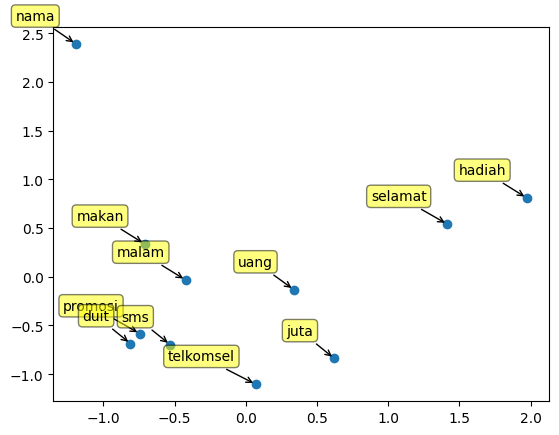

In [21]:
plot(red_word_vectors, word_list)

## FastText (Pre-Trained Model)
Pada contoh Word2Vec diatas, kita melatih suatu shallow neural network pada dataset SMS spam untuk mendapatkan word vectors. Pada contoh FastText ini, kita akan memanfaatkan pre-trained word vector yang sudah dilatih pada kumpulan data yang besar.

In [22]:
!pip -q install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [23]:
# Download dan unzip dataset
# Warning: proses download lama dan memakan diskspace yang besar (sekitar 7GB)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz
!gunzip cc.id.300.bin.gz

--2023-04-21 19:32:24--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.33.88.16, 13.33.88.28, 13.33.88.98, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.33.88.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4507049071 (4.2G) [application/octet-stream]
Saving to: ‘cc.id.300.bin.gz’

cc.id.300.bin.gz    100%[===================>]   4.20G   216MB/s    in 18s     

2023-04-21 19:32:43 (238 MB/s) - ‘cc.id.300.bin.gz’ saved [4507049071/4507049071]



In [24]:
import fasttext

# Load model FastText
ft_model = fasttext.load_model("cc.id.300.bin")

In [25]:
# Lihat vektor kata tertentu menggunakan pre-trained FastText
print(ft_model['hadiah'])

[ 2.14822497e-02  2.02236886e-04 -6.27767369e-02  4.09120731e-02
 -2.95249615e-02 -7.92719144e-03  6.23011077e-03 -4.92688827e-02
 -3.57456766e-02 -8.07150006e-02 -3.37385051e-02 -4.19565998e-02
 -4.39852625e-02 -7.25872209e-03  3.43866535e-02  4.68273424e-02
 -5.34032546e-02 -1.53756738e-02  7.66648948e-02  7.82914236e-02
 -1.86638068e-02  7.80785829e-02  7.34530315e-02  4.04092260e-02
 -1.80559270e-02 -1.04434066e-01  6.31858641e-03  6.92676380e-03
  7.16269985e-02 -1.49584105e-02  4.56970036e-02  4.85460320e-03
  1.07012309e-01 -3.17603834e-02 -1.12262210e-02 -1.13926139e-02
 -1.58776119e-02 -3.95030752e-02  2.38184314e-02  5.06121687e-05
  1.00689549e-02  1.61063876e-02 -3.70445400e-02  3.12220361e-02
 -3.21603231e-02  8.42529759e-02  7.11059896e-03  2.97593214e-02
 -5.91725223e-02  7.97085762e-02  3.08816731e-02  8.03474784e-02
 -3.19909155e-02 -1.14176787e-01  2.04940531e-02 -2.02229731e-02
  9.20622423e-02  1.56875178e-02 -1.81012359e-02  1.74055584e-02
 -2.39754561e-02  5.78499

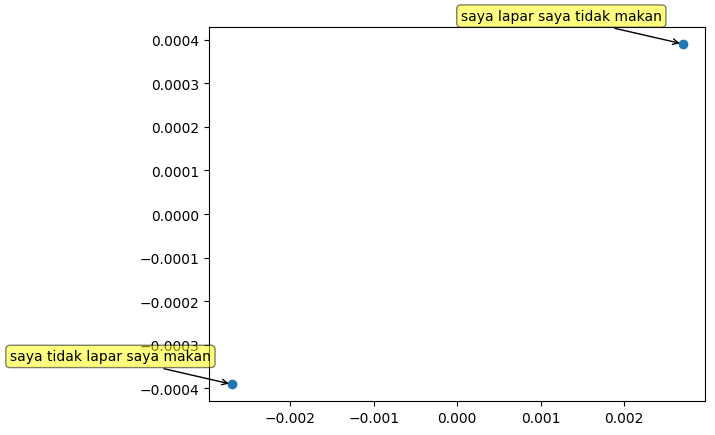

In [26]:
list_kalimat = ['saya lapar saya tidak makan', 'saya tidak lapar saya makan'] 
word_vectors_fasttext = np.array([ft_model[w] for w in list_kalimat])
pca = PCA(n_components=2, copy=False, whiten=True) # Proses reduksi dimensi

fasttext_word_vectors = pca.fit_transform(word_vectors_fasttext)

plot(word_vectors_fasttext, list_kalimat)

# 06 Deep Learning for NLP

## Long short term memory network (LSTM)

### Memilih Panjang Sequence (max_length)

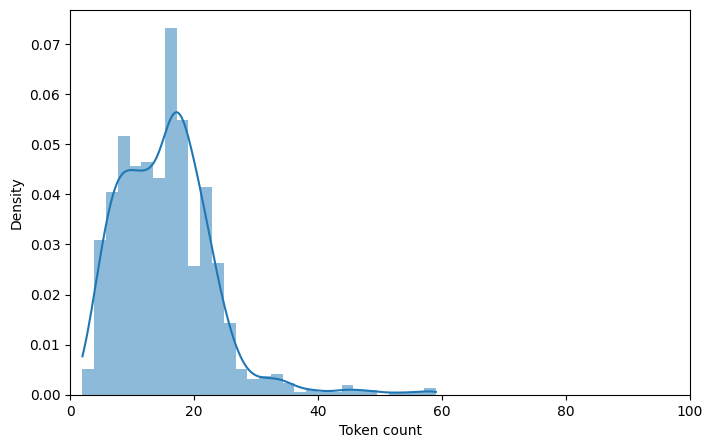

In [27]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for text in data['clean_teks']:
    tokens = text.split()
    token_lens.append(len(tokens))

plt.figure(figsize=(8, 5))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [28]:
MAX_SEQ_LENGTH = 40

### Preparing Data for Embedding Layer

#### Tokenizing Data
Proses ini berbeda dengan tokenization pada text-preprocessing. Pada pemodelan dengan deep learning, tokenization merujuk pada membuat dictionary berdasarkan dataset.

In [29]:
'''
Proses vektorisasi teks dengan mengubah setiap teks menjadi token urutan bilangan int (setiap bilangan int menjadi indeks token dalam dictionary) 
'''
from keras.preprocessing.text import Tokenizer

In [30]:
NUM_WORDS = 100       # Frekuensi kemunculan kata. Hanya num_words-1 yang akan disimpan pada dictionary. Berarti kata dengan kemunculan <=num_words tidak digunakan.
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary.

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN, lower=True, split=' ')
tokenizer.fit_on_texts(data['clean_teks'])

# Tambahkan token padding untuk menyamakan ukuran dimensi embedding layer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

WV_DICTIONARY = tokenizer.word_index

WV_DICTIONARY_SIZE = len(WV_DICTIONARY)
print(WV_DICTIONARY_SIZE) # Lihat kata unik pada dictionary yang dihasilkan

4287


In [31]:
WV_DICTIONARY

{'<unk>': 1,
 'di': 2,
 'anda': 3,
 'ke': 4,
 'ini': 5,
 'info': 6,
 'ada': 7,
 'yg': 8,
 'aku': 9,
 'mau': 10,
 'dan': 11,
 'hadiah': 12,
 'dari': 13,
 'pin': 14,
 'no': 15,
 'sms': 16,
 'klik': 17,
 'cek': 18,
 'rp': 19,
 'nama': 20,
 'aja': 21,
 'pulsa': 22,
 'paket': 23,
 'hub': 24,
 'saya': 25,
 'yang': 26,
 'ya': 27,
 'untuk': 28,
 'hari': 29,
 'promo': 30,
 'jt': 31,
 'resmi': 32,
 'atau': 33,
 'rb': 34,
 'gb': 35,
 'pemenang': 36,
 'bisa': 37,
 'selamat': 38,
 'isi': 39,
 'kalau': 40,
 'utk': 41,
 'dr': 42,
 'jam': 43,
 'dengan': 44,
 'uinfo': 45,
 'nya': 46,
 'kamu': 47,
 'tri': 48,
 'ga': 49,
 'kuota': 50,
 'gratis': 51,
 'sd': 52,
 'ketik': 53,
 'ulang': 54,
 'care': 55,
 'bonus': 56,
 'hanya': 57,
 'sudah': 58,
 'pak': 59,
 'beli': 60,
 'berlaku': 61,
 'maaf': 62,
 'dgn': 63,
 'indosat': 64,
 'juga': 65,
 'bb': 66,
 'kita': 67,
 'itu': 68,
 'kalo': 69,
 'sama': 70,
 'nanti': 71,
 'kirim': 72,
 'mobil': 73,
 'telah': 74,
 'kasih': 75,
 'yth': 76,
 'kami': 77,
 'sekarang': 78

In [32]:
# Lihat dictionary hasil tokenisasi
WV_DICTIONARY

{'<unk>': 1,
 'di': 2,
 'anda': 3,
 'ke': 4,
 'ini': 5,
 'info': 6,
 'ada': 7,
 'yg': 8,
 'aku': 9,
 'mau': 10,
 'dan': 11,
 'hadiah': 12,
 'dari': 13,
 'pin': 14,
 'no': 15,
 'sms': 16,
 'klik': 17,
 'cek': 18,
 'rp': 19,
 'nama': 20,
 'aja': 21,
 'pulsa': 22,
 'paket': 23,
 'hub': 24,
 'saya': 25,
 'yang': 26,
 'ya': 27,
 'untuk': 28,
 'hari': 29,
 'promo': 30,
 'jt': 31,
 'resmi': 32,
 'atau': 33,
 'rb': 34,
 'gb': 35,
 'pemenang': 36,
 'bisa': 37,
 'selamat': 38,
 'isi': 39,
 'kalau': 40,
 'utk': 41,
 'dr': 42,
 'jam': 43,
 'dengan': 44,
 'uinfo': 45,
 'nya': 46,
 'kamu': 47,
 'tri': 48,
 'ga': 49,
 'kuota': 50,
 'gratis': 51,
 'sd': 52,
 'ketik': 53,
 'ulang': 54,
 'care': 55,
 'bonus': 56,
 'hanya': 57,
 'sudah': 58,
 'pak': 59,
 'beli': 60,
 'berlaku': 61,
 'maaf': 62,
 'dgn': 63,
 'indosat': 64,
 'juga': 65,
 'bb': 66,
 'kita': 67,
 'itu': 68,
 'kalo': 69,
 'sama': 70,
 'nanti': 71,
 'kirim': 72,
 'mobil': 73,
 'telah': 74,
 'kasih': 75,
 'yth': 76,
 'kami': 77,
 'sekarang': 78

#### Text to Sequence

In [33]:
# Proses mengubah token hasil tokenisasi menjadi urutan bilangan int berdasarkan index dictionary.
data_seq = tokenizer.texts_to_sequences(data['clean_teks'])

In [34]:
# Lihat hasil setelah di ubah menjadi sequences
print(data['clean_teks'][10])
print(data_seq[10])

anda akan berhenti berlangganan paket flash ketik flashspasiya jika setuju tunggu sms konfirmasi penonaktifan paket anda
[3, 1, 1, 1, 23, 96, 53, 1, 1, 1, 1, 16, 1, 1, 23, 3]


#### Add Padding & Truncation

In [35]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00


In [36]:
'''
Proses mengubah data dari sequence menjadi array bentuk 2D Numpy (num_samples, num_timesteps). 
num_timesteps adalah argumen maxlen jika disediakan, atau panjang dari sequence terpanjang dalam daftar.

Sequence yang lebih pendek dari num_timesteps diisi dengan nilai hingga panjangnya sama dengan num_timesteps (padding).
Sequence yang lebih panjang dari num_timesteps dipotong sehingga sesuai dengan panjang yang diinginkan (truncate).
'''

from keras_preprocessing.sequence import pad_sequences

In [37]:
PADDING = 'post'        # Berikan padding untuk setiap sequences. Terdapat dua pilihan dalam melakukan padding 'pre' or 'post'.
TRUNCATING = 'post'     # Menghapus token dari sequences yang lebih besar dari max_lenght. Terdapat dua pilihan dalam melakukan truncanting 'pre' or 'post'.

data_pad = pad_sequences(data_seq, maxlen=MAX_SEQ_LENGTH, padding=PADDING, truncating=TRUNCATING)

In [38]:
print(data['clean_teks'][10])
print(data_seq[10])
print(data_pad[10])

anda akan berhenti berlangganan paket flash ketik flashspasiya jika setuju tunggu sms konfirmasi penonaktifan paket anda
[3, 1, 1, 1, 23, 96, 53, 1, 1, 1, 1, 16, 1, 1, 23, 3]
[ 3  1  1  1 23 96 53  1  1  1  1 16  1  1 23  3  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


#One Hot Encoding
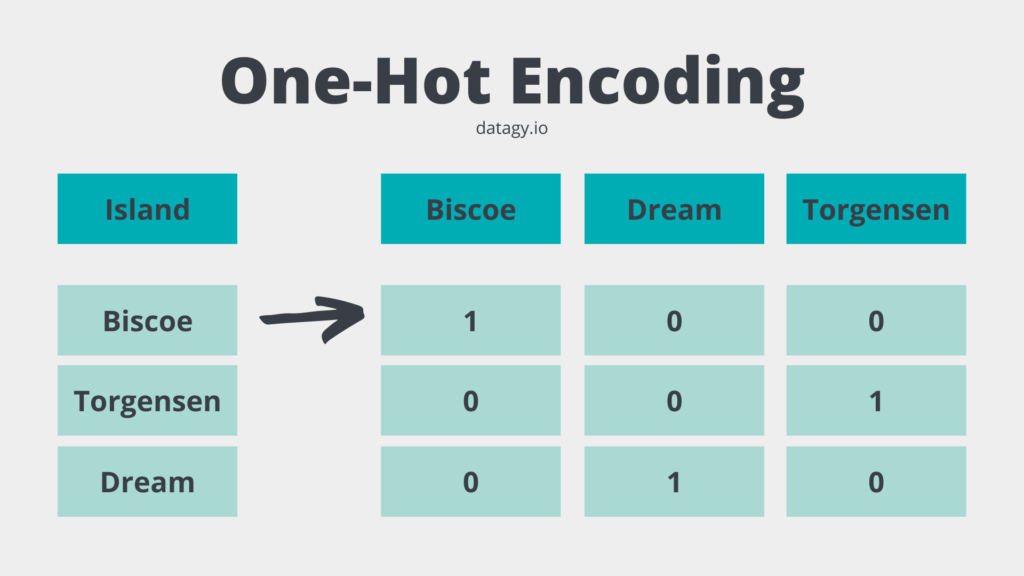

In [39]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(data['label'], num_classes=len(data['label'].unique()))  # Lakukan one-hot encoding pada label (y)

In [40]:
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### Train & Test Data Splitting

In [41]:
# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data_pad, Y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 40), (229, 40), (914, 3), (229, 3))

In [42]:
X_train

array([[ 7,  8,  1, ...,  0,  0,  0],
       [ 9,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  9, ...,  0,  0,  0],
       ...,
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 9, 49,  4, ...,  0,  0,  0],
       [ 1, 39,  1, ...,  0,  0,  0]], dtype=int32)

### Define Model Architecture (LSTM)



In [43]:
'''
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model_LSTM = Sequential()
model_LSTM.add(Embedding(                                           # Buat embedding layer yang menerima panjang dictionary hasil Tokenisasi
    input_dim = WV_DICTIONARY_SIZE,
    input_length = MAX_SEQ_LENGTH,
    output_dim = 64))      
model_LSTM.add(LSTM(64))                                            # Tambahkan satu layer LSTM
model_LSTM.add(Dropout(0.5))                             
model_LSTM.add(Dense(3, activation='softmax'))

In [44]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            274368    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 307,587
Trainable params: 307,587
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile model
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [46]:
%%time

EPOCH = 10
BATCH_SIZE = 32 # Batch size adalah jumlah total sampel data training yang ada di setiap batch. Misalnya, jika kita membagi 914 sampel data tersebut menjadi 29 batch, maka batch size-nya adalah 32.

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
29/29 [==============================] - 12s 145ms/step - loss: 1.0352 - accuracy: 0.4781 - val_loss: 0.9135 - val_accuracy: 0.5066
Epoch 2/10
29/29 [==============================] - 2s 54ms/step - loss: 0.7607 - accuracy: 0.6313 - val_loss: 0.7701 - val_accuracy: 0.6332
Epoch 3/10
29/29 [==============================] - 1s 41ms/step - loss: 0.6596 - accuracy: 0.6707 - val_loss: 0.5811 - val_accuracy: 0.7336
Epoch 4/10
29/29 [==============================] - 0s 15ms/step - loss: 0.5621 - accuracy: 0.7046 - val_loss: 0.4929 - val_accuracy: 0.7686
Epoch 5/10
29/29 [==============================] - 0s 7ms/step - loss: 0.5481 - accuracy: 0.7210 - val_loss: 0.5544 - val_accuracy: 0.7424
Epoch 6/10
29/29 [==============================] - 0s 14ms/step - loss: 0.5395 - accuracy: 0.7374 - val_loss: 0.4947 - val_accuracy: 0.7686
Epoch 7/10
29/29 [==============================] - 0s 15ms/step - loss: 0.5064 - accuracy: 0.7298 - val_loss: 0.4711 - val_accuracy: 0.7642
Epoch 8/10
2

In [47]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

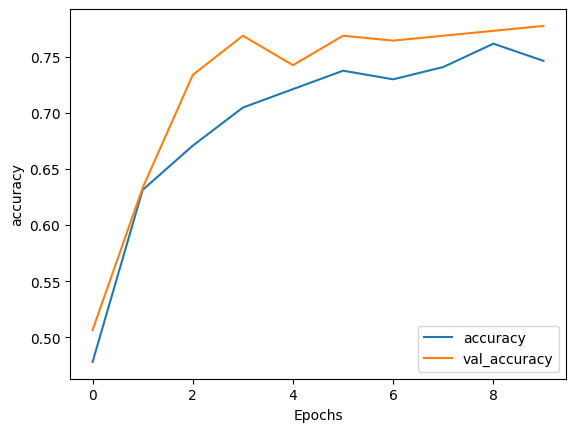

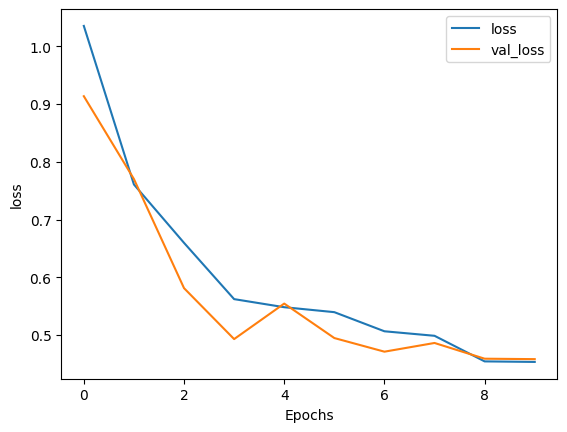

In [48]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [49]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.478118 	   1.035207 	   0.506550 	   0.913500
       2   0.631291 	   0.760650 	   0.633188 	   0.770072
       3   0.670678 	   0.659566 	   0.733624 	   0.581122
       4   0.704595 	   0.562113 	   0.768559 	   0.492920
       5   0.721007 	   0.548126 	   0.742358 	   0.554409
       6   0.737418 	   0.539549 	   0.768559 	   0.494722
       7   0.729759 	   0.506437 	   0.764192 	   0.471119
       8   0.740700 	   0.498619 	   0.768559 	   0.486199
       9   0.761488 	   0.454297 	   0.772926 	   0.458961
      10   0.746171 	   0.453380 	   0.777293 	   0.458205


### Evaluate

In [50]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_LSTM.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_LSTM.evaluate(X_test, y_test)

8/8 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.7773


In [51]:
from sklearn.metrics import classification_report

# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       116
           1       0.99      0.60      0.75       113
           2       0.00      0.00      0.00         0

    accuracy                           0.78       229
   macro avg       0.65      0.52      0.57       229
weighted avg       0.97      0.78      0.85       229



## Bidirectional Long short term memory network (Bi-LSTM) + Word2Vec
Contoh sebelumnya kita hanya menggunakan dictionary yang dihasilkan ketika proses Tokenizing. Lalu, ketika pemodelan ditambahkan layer embedding sebelum di fitkan ke layer LSTM.


Selanjutnya, kita akan memanfaatkan word2vec yang telah dilatih pada proses sebelumnya untuk mengubah teks menjadi bentuk vektor.





### Load Word2Vec

In [52]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')
words = list(my_word2vec.key_to_index.keys())
words

['di',
 'anda',
 'ke',
 'ini',
 'info',
 'yg',
 'ada',
 'aku',
 'mau',
 'hadiah',
 'dan',
 'dari',
 'sms',
 'no',
 'klik',
 'pin',
 'cek',
 'rp',
 'aja',
 'nama',
 'pulsa',
 'paket',
 'hub',
 'saya',
 'yang',
 'ya',
 'untuk',
 'hari',
 'promo',
 'jt',
 'resmi',
 'atau',
 'rb',
 'gb',
 'bisa',
 'selamat',
 'isi',
 'kalau',
 'pemenang',
 'dr',
 'utk',
 'jam',
 'dengan',
 'uinfo',
 'ga',
 'nya',
 'kamu',
 'tri',
 'kuota',
 'gratis',
 'sd',
 'ketik',
 'ulang',
 'care',
 'bonus',
 'pak',
 'hanya',
 'sudah',
 'beli',
 'berlaku',
 'maaf',
 'indosat',
 'dgn',
 'bb',
 'kita',
 'itu',
 'juga',
 'kalo',
 'sama',
 'nanti',
 'telah',
 'kirim',
 'mobil',
 'kasih',
 'kami',
 'yth',
 'kode',
 'cuma',
 'nikmati',
 'pesan',
 'undian',
 'sekarang',
 'dulu',
 'internetan',
 'nomor',
 'mendapatkan',
 'teh',
 'pake',
 'internet',
 'lagi',
 'dg',
 'tapi',
 'jadi',
 'poin',
 'flash',
 'besok',
 'tp',
 'hr',
 'an',
 'apa',
 'udah',
 'kan',
 'unit',
 'kartu',
 'pelanggan',
 'baru',
 'buat',
 'mulai',
 'akan',
 

In [53]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')
#my_word2vec_vocab = my_word2vec.wv.vocab   //deprecated to load vocab  
my_word2vec_vocab = list(my_word2vec.key_to_index.keys())

VOCAB_SIZE = len(my_word2vec_vocab)
EMBEDDING_SIZE = my_word2vec.vector_size

print(VOCAB_SIZE)
print(EMBEDDING_SIZE)

4289
100


In [54]:
word2vec_dict = {}

for word in my_word2vec_vocab:
    word2vec_dict[word] = my_word2vec.get_vector(word)   
    
print('The numbers of key-value pairs: ', len(word2vec_dict)) # Harus sama dengan ukuran vocab word2vec

The numbers of key-value pairs:  4289


### Create Embedding Matrix

In [55]:
EMBEDDING_MATRIX = np.zeros(shape=(WV_DICTIONARY_SIZE, EMBEDDING_SIZE))

for word, i in tokenizer.word_index.items():
  embed_vector = word2vec_dict.get(word)
  if embed_vector is not None:               # Word is in the vocabulary learned by the w2v model
    EMBEDDING_MATRIX[i] = embed_vector

In [56]:
# Cek index keberapa di Word2Vec vocabulary dari suatu kata
print(WV_DICTIONARY.get('saya'))

25


In [57]:
# Cek vector dari suatu kata
print(EMBEDDING_MATRIX[25])

[-0.14809616  0.13817668  0.02700539 -0.0342848  -0.11365508 -0.30563086
  0.10981879  0.44829586 -0.18721481 -0.24658209 -0.14879894 -0.26259831
  0.04311179 -0.05223787 -0.02317398 -0.00238977  0.23612007 -0.24135883
 -0.26516509 -0.18241382 -0.07328281  0.1834607   0.03412788 -0.10262306
 -0.12945992  0.20647569 -0.20854379 -0.25144899 -0.33346111  0.07116815
  0.30393845  0.13970339 -0.02527371 -0.05709878 -0.20814557  0.23959775
 -0.1295895  -0.28283119 -0.10827995 -0.6107741  -0.03373942 -0.2846517
  0.06242685  0.04360552  0.24924731 -0.16614062 -0.13620454 -0.0200901
  0.02977774  0.09139744 -0.06938533 -0.27178669 -0.11118187 -0.19611467
 -0.30799362  0.07430545  0.08164564  0.13826236 -0.2819103   0.07896889
 -0.02719304  0.10071114 -0.01821892  0.04291305 -0.32765421  0.50553548
 -0.01085127  0.26175958 -0.24389546  0.13768634 -0.09449048  0.17136861
  0.24882308 -0.2291963   0.26588559  0.21564445 -0.12138034  0.04496414
 -0.36760089 -0.146522    0.31222802 -0.01073781 -0.1

In [58]:
# Cek dimensi word vector. X = jumlah kata pada vocabulary, y = dimensi vektor
EMBEDDING_MATRIX.shape

(4287, 100)

### Define Model (Bi LSTM)
Nah, sekarang kita membahkan layer embedding berdasarkan matrix embedding yang di dapatkan dari word2vec yang sudah kita latih sebelumnya. Selain itu, kita akan mencoba menggunakan arsitektur Bidirectional LSTM.

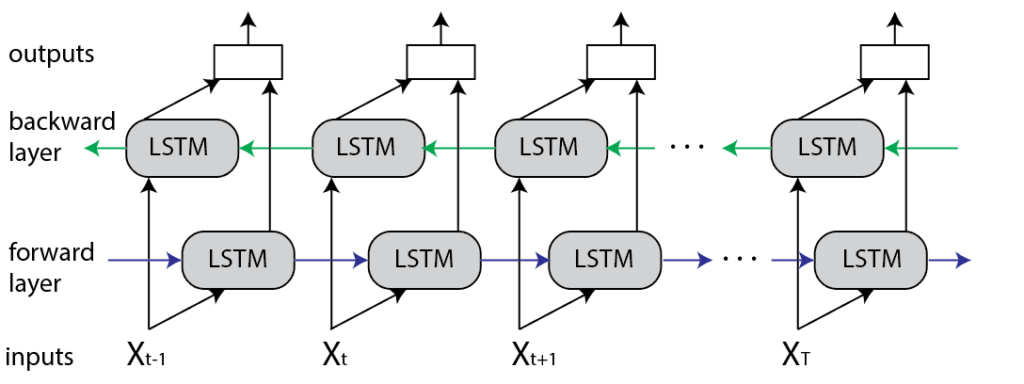



In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.initializers import Constant

model_BiLSTM_w2v = Sequential()
model_BiLSTM_w2v.add(Embedding(
    input_dim = WV_DICTIONARY_SIZE,
    output_dim = EMBEDDING_SIZE,
    input_length = MAX_SEQ_LENGTH,
    trainable = False,
    embeddings_initializer = Constant(EMBEDDING_MATRIX)))
model_BiLSTM_w2v.add(Bidirectional(LSTM(64)))
model_LSTM.add(Dropout(0.5))  
model_BiLSTM_w2v.add(Dense(3, activation='softmax'))

In [60]:
model_BiLSTM_w2v.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 100)           428700    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 513,567
Trainable params: 84,867
Non-trainable params: 428,700
_________________________________________________________________


In [61]:
# Compile model
model_BiLSTM_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [62]:
%%time

EPOCH = 10
BATCH_SIZE = 32

history_BiLSTM_w2v = model_BiLSTM_w2v.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
29/29 [==============================] - 5s 46ms/step - loss: 0.8048 - accuracy: 0.6958 - val_loss: 0.4156 - val_accuracy: 0.8428
Epoch 2/10
29/29 [==============================] - 0s 10ms/step - loss: 0.4793 - accuracy: 0.8228 - val_loss: 0.3614 - val_accuracy: 0.8734
Epoch 3/10
29/29 [==============================] - 0s 9ms/step - loss: 0.4316 - accuracy: 0.8425 - val_loss: 0.3330 - val_accuracy: 0.8734
Epoch 4/10
29/29 [==============================] - 0s 10ms/step - loss: 0.4160 - accuracy: 0.8479 - val_loss: 0.3326 - val_accuracy: 0.8777
Epoch 5/10
29/29 [==============================] - 0s 10ms/step - loss: 0.4020 - accuracy: 0.8501 - val_loss: 0.2985 - val_accuracy: 0.8690
Epoch 6/10
29/29 [==============================] - 0s 9ms/step - loss: 0.3974 - accuracy: 0.8600 - val_loss: 0.3035 - val_accuracy: 0.8821
Epoch 7/10
29/29 [==============================] - 0s 8ms/step - loss: 0.3994 - accuracy: 0.8545 - val_loss: 0.3229 - val_accuracy: 0.8865
Epoch 8/10
29/29

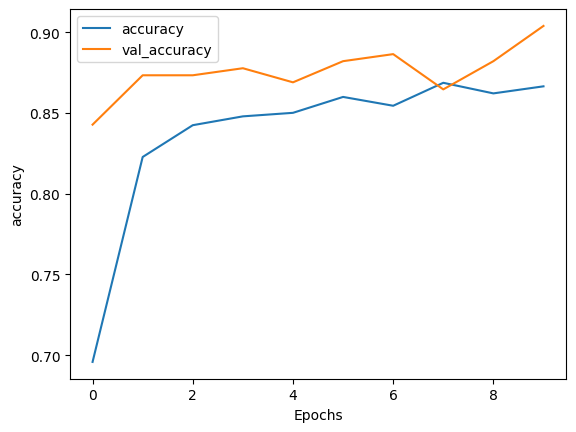

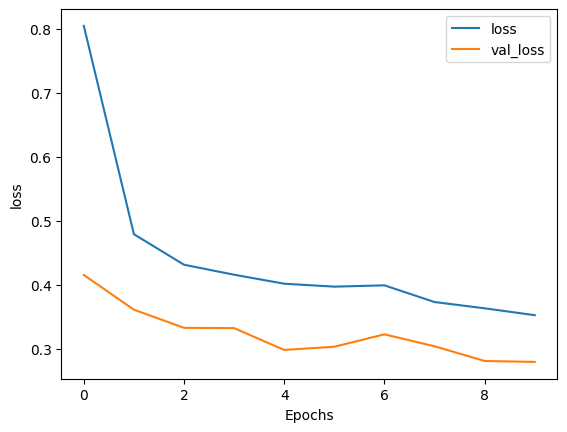

In [63]:
plot_graphs(history_BiLSTM_w2v, 'accuracy')
plot_graphs(history_BiLSTM_w2v, 'loss')

In [64]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_BiLSTM_w2v.history['accuracy'][i], history_BiLSTM_w2v.history['loss'][i], history_BiLSTM_w2v.history['val_accuracy'][i], history_BiLSTM_w2v.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.695842 	   0.804781 	   0.842795 	   0.415629
       2   0.822757 	   0.479318 	   0.873362 	   0.361424
       3   0.842451 	   0.431640 	   0.873362 	   0.333015
       4   0.847921 	   0.416014 	   0.877729 	   0.332576
       5   0.850109 	   0.401981 	   0.868996 	   0.298507
       6   0.859956 	   0.397401 	   0.882096 	   0.303477
       7   0.854486 	   0.399435 	   0.886463 	   0.322889
       8   0.868709 	   0.373355 	   0.864629 	   0.304210
       9   0.862144 	   0.363547 	   0.882096 	   0.281254
      10   0.866521 	   0.352821 	   0.903930 	   0.279778


### Evaluate

In [65]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_BiLSTM_w2v.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_BiLSTM_w2v.evaluate(X_test, y_test)

8/8 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.9039


In [66]:
# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       117
           1       0.80      0.93      0.86        59
           2       0.91      0.77      0.84        53

    accuracy                           0.90       229
   macro avg       0.89      0.88      0.88       229
weighted avg       0.91      0.90      0.90       229



# 07 Student Activity

1. Bagaimana word embedding dapat meningkatkan akurasi model? 
2. Lakukan hyperparameter tuning dari kedua metode klasifikasi di atas ? apakah terjadi perubahan performa ? Mengapa demikian?


In [67]:
import random

randomlist = random.sample(range(1, 28), 3)
print(randomlist)

[22, 11, 26]
